In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [5]:
train_df = pd.read_csv("datasaham-train.csv")

In [6]:
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-23,1133.857056,1146.598999,1133.411011,1137.423950,1137.423950,8709700.0
1,2005-06-24,1127.418945,1135.666992,1127.418945,1135.666992,1135.666992,8808200.0
2,2005-06-27,1129.614014,1130.503052,1116.261963,1119.897949,1119.897949,7461800.0
3,2005-06-28,1118.026978,1128.066040,1116.336060,1127.817017,1127.817017,8239400.0
4,2005-06-29,1129.046021,1130.463013,1123.597046,1126.857056,1126.857056,6213200.0


In [7]:
df = train_df.dropna()

In [8]:
data = df.drop(columns=['Date'])

In [9]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,1133.857056,1146.598999,1133.411011,1137.423950,1137.423950,8709700.0
1,1127.418945,1135.666992,1127.418945,1135.666992,1135.666992,8808200.0
2,1129.614014,1130.503052,1116.261963,1119.897949,1119.897949,7461800.0
3,1118.026978,1128.066040,1116.336060,1127.817017,1127.817017,8239400.0
4,1129.046021,1130.463013,1123.597046,1126.857056,1126.857056,6213200.0


In [10]:
data_close = df[['Close']]

In [11]:
df = (data-data.min()) / (data.max()-data.min())

In [12]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
0,0.027286,0.021819,0.032057,0.025051,0.025051,0.000890
1,0.026159,0.019891,0.031003,0.024743,0.024743,0.000900
2,0.026543,0.018980,0.029040,0.021973,0.021973,0.000762
3,0.024513,0.018550,0.029053,0.023364,0.023364,0.000842
4,0.026443,0.018973,0.030330,0.023195,0.023195,0.000635


In [13]:
train_x = df
train_y = df[['Close']] 

In [14]:
train_x.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.027286,0.021819,0.032057,0.025051,0.025051,0.000890
1,0.026159,0.019891,0.031003,0.024743,0.024743,0.000900
2,0.026543,0.018980,0.029040,0.021973,0.021973,0.000762
3,0.024513,0.018550,0.029053,0.023364,0.023364,0.000842
4,0.026443,0.018973,0.030330,0.023195,0.023195,0.000635


In [15]:
train_y.head()

,Close
0,0.025051
1,0.024743
2,0.021973
3,0.023364
4,0.023195


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import load_model

In [17]:
#membuat model
regressor = Sequential()

In [18]:
#get number of columns in training data
n_cols = train_x.shape[1]

In [19]:
#adding the input layer and the first hidden layer and drop our regularization
regressor.add(Dense(units = 500, kernel_initializer = 'uniform', activation = 'relu', input_shape=(n_cols,)))
regressor.add(Dropout(.2))

In [20]:
#adding the output layer
regressor.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [21]:
#compiling the NN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [22]:
#fitting the NN to the training set
regressor.fit(train_x, train_y, validation_split=0.3, epochs =50)

Epoch 1/50
80/80 [==============================] - 3s 9ms/step - loss: 0.0368 - val_loss: 0.0027
Epoch 2/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0020 - val_loss: 9.5586e-04
Epoch 3/50
80/80 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/50
80/80 [==============================] - 0s 3ms/step - loss: 6.7225e-04 - val_loss: 0.0021
Epoch 5/50
80/80 [==============================] - 0s 3ms/step - loss: 4.6352e-04 - val_loss: 0.0026
Epoch 6/50
80/80 [==============================] - 0s 3ms/step - loss: 3.2256e-04 - val_loss: 0.0035
Epoch 7/50
80/80 [==============================] - 0s 3ms/step - loss: 2.4551e-04 - val_loss: 0.0043
Epoch 8/50
80/80 [==============================] - 0s 3ms/step - loss: 2.1647e-04 - val_loss: 0.0058
Epoch 9/50
80/80 [==============================] - 0s 3ms/step - loss: 1.9146e-04 - val_loss: 0.0067
Epoch 10/50
80/80 [==============================] - 0s 3ms/step - loss: 1.6924e-04 - val_

In [23]:
#save trained model
regressor.save('model.h5')

In [25]:
#read in data test using pandas
test_df = pd.read_csv('datasaham-test.csv')

In [26]:
test_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-23,4918.831055,4938.394043,4879.132813,4879.132813,4879.132813,54884300
1,2020-06-24,4879.132813,4977.650879,4879.132813,4964.734863,4964.734863,62466500
2,2020-06-25,4964.734863,4964.734863,4883.709961,4896.729980,4896.729980,50705900
3,2020-06-26,4896.729980,4941.138184,4882.141113,4904.087891,4904.087891,44280300
4,2020-06-29,4904.087891,4909.905762,4862.041016,4901.817871,4901.817871,44174500


In [27]:
#delete NaN
test_data = test_df.dropna()

In [28]:
#drop date
test_data = test_df.drop(columns=['Date'])
data_test_close = test_df[['Close']]

In [29]:
#normalization
nor = (test_data-test_data.min())/(test_data.max()-test_data.min())

In [30]:
#create a dataframe with all training data except the target columns
test_x = nor

In [31]:
#create a dataframe with only the target column
test_y = nor[['Close']]

In [32]:
import matplotlib.pyplot as plt

#load trained model
regressor = load_model('model.h5')

#predict and test the model
input_data = test_x.values
real_close_price = test_y.values

predicted_close_price = regressor.predict(input_data)

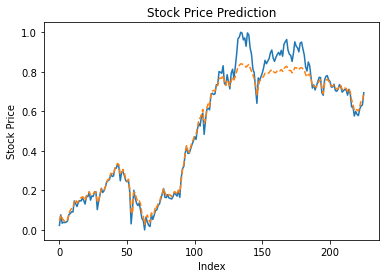

Mean Square Error:  0.0012164984542317825


In [33]:
target = real_close_price[~np.isnan(real_close_price)]
predict = predicted_close_price[~np.isnan(real_close_price)]
plt.plot(target)
plt.plot(predict, '--')
plt.title('Stock Price Prediction')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.show()

def mse(predictions, targets):
    return 0.5 * (((predictions - targets) ** 2).mean())

#mse = ((real_close_price - predicted_close_price) ** 2).mean(axis=1)
print('Mean Square Error: ',mse(predict.flatten(),target.flatten()))